In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

from utils.data_visualizers import view_word_frequency

%load_ext autoreload
%autoreload 2

## Merge partial answers of identified jurisprudence by year

In [2]:


years = ['1901-1920', '1921-1940', '1941-1960', '1961-1980', '1981-1995', '1996', '1997',
 '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
 '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
 '2018', '2019', '2020', '2021']

# build paths to use to for pd.read_csv

def find_csv_paths(years: list) -> list:
    paths = []
    for year in years:
        try:
            path = f'../raw jurisprudence/answers_{year}'
            dirs = os.listdir(path)
            # print(dirs)

            paths.extend([f'{path}/{partial_path}' for partial_path in dirs])
        except FileNotFoundError as e:
            print(f'FileNotFoundError occured. File {e.filename} does not exist')
        finally:
            # print('passed')
            pass

    return paths

print(find_csv_paths(years))

# answers_1901_1920 = pd.read_csv('../raw jurisprudence/answers_1901-1920/answers_1901-1920__partial.csv (2)')
# answers_1901_1920_1 = pd.read_csv('../raw jurisprudence/answers_1901_1920/answers_1901_1920__partial.csv')


['../raw jurisprudence/answers_1901-1920/answers_1901-1920__partial (2).csv', '../raw jurisprudence/answers_1901-1920/answers_1901-1920__partial.csv', '../raw jurisprudence/answers_1921-1940/answers_1921-1940__partial (2).csv', '../raw jurisprudence/answers_1921-1940/answers_1921-1940__partial.csv', '../raw jurisprudence/answers_1941-1960/answers_1941-1960__partial (2).csv', '../raw jurisprudence/answers_1941-1960/answers_1941-1960__partial.csv', '../raw jurisprudence/answers_1961-1980/answers_1961-1980__partial (2).csv', '../raw jurisprudence/answers_1961-1980/answers_1961-1980__partial.csv', '../raw jurisprudence/answers_1981-1995/answers_1981-1995__partial (2).csv', '../raw jurisprudence/answers_1981-1995/answers_1981-1995__partial.csv', '../raw jurisprudence/answers_1996/answers_1996__partial (2).csv', '../raw jurisprudence/answers_1996/answers_1996__partial.csv', '../raw jurisprudence/answers_1997/answers_1997__partial (2).csv', '../raw jurisprudence/answers_1997/answers_1997__par

In [3]:
# append all .csv files given paths
answers__df = pd.DataFrame(columns=['file_path', 'answer'])
total_rows = 0
for path in find_csv_paths(years):
    temp_answers__df = pd.read_csv(path, index_col=0)
    answers__df = pd.concat([answers__df, temp_answers__df.copy()], ignore_index=True)

    print(temp_answers__df.shape)
    total_rows += temp_answers__df.shape[0]
    

(277, 2)
(574, 2)
(276, 2)
(580, 2)
(273, 2)
(566, 2)
(267, 2)
(559, 2)
(346, 2)
(686, 2)
(240, 2)
(542, 2)
(281, 2)
(547, 2)
(13, 2)
(13, 2)
(1535, 2)
(1363, 2)
(483, 2)
(1199, 2)
(1338, 2)
(1521, 2)
(1480, 2)
(1438, 2)
(1451, 2)
(1443, 2)
(1281, 2)
(991, 2)
(958, 2)
(957, 2)
(1027, 2)
(964, 2)
(25, 2)
(1061, 2)
(28, 2)
(976, 2)
(25, 2)
(1072, 2)
(1087, 2)
(859, 2)
(20, 2)


In [4]:
total_rows

30622

In [5]:
answers__df.head()

,file_path,answer
0,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,Not labor related.
1,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,TIME_LIMIT_REACHED
2,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,RATE_LIMIT_ERROR
3,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,not labor related
4,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,not labor related


In [6]:
answers__df.tail()

,file_path,answer
30617,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,not labor related
30618,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,INVALID_REQUEST_ERROR
30619,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,INVALID_REQUEST_ERROR
30620,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,not labor related
30621,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,labor related


# Clean answers column

In [7]:
# convert to uppercase
answers__df['answer'] = answers__df['answer'].apply(lambda answer: answer.upper())
unique, counts = np.unique(answers__df['answer'], return_counts=True)
res = list(zip(unique, counts))
print(res, sep='A')

[('API_CONNECTION_ERROR', 9), ('BASED ON THE GIVEN INFORMATION, IT IS NOT POSSIBLE TO DETERMINE WHETHER THIS CASE IS LABOR RELATED OR NOT LABOR RELATED.', 1), ('BASED ON THE GIVEN INFORMATION, THE CASE LAW IS NOT LABOR RELATED.', 1), ('BASED ON THE GIVEN INFORMATION, THIS CASE LAW IS NOT LABOR RELATED.', 1), ('BASED ON THE GIVEN INFORMATION, THIS PIECE OF CASE LAW IS NOT LABOR RELATED.', 1), ('BASED ON THE GIVEN INFORMATION, THIS PIECE OF CASE LAW IS NOT LABOR-RELATED.', 2), ('BASED ON THE GIVEN TEXT, IT IS NOT', 1), ('BASED ON THE INFORMATION PROVIDED, IT IS NOT POSSIBLE TO DETERMINE IF THIS CASE IS LABOR RELATED OR NOT LABOR RELATED.', 1), ('BASED ON THE INFORMATION PROVIDED, IT IS NOT POSSIBLE TO DETERMINE WHETHER THIS PIECE OF CASE LAW IS LABOR RELATED OR NOT LABOR RELATED.', 1), ('BASED ON THE INFORMATION PROVIDED, THE CASE IS NOT LABOR-RELATED.', 1), ('BASED ON THE INFORMATION PROVIDED, THE PIECE OF CASE LAW IS "NOT LABOR RELATED."', 1), ('BASED ON THE INFORMATION PROVIDED, THIS 

In [8]:
# remove all non alpha numeric characters and preserve whitespace
answers__df['answer'] = answers__df['answer'].apply(lambda answer: re.sub(r'[^a-zA-Z0-9_\s]', ' ', answer))
unique, counts = np.unique(answers__df['answer'], return_counts=True)
print(list(zip(unique, counts)), sep='\n')

[('API_CONNECTION_ERROR', 9), ('BASED ON THE GIVEN INFORMATION  IT IS NOT POSSIBLE TO DETERMINE WHETHER THIS CASE IS LABOR RELATED OR NOT LABOR RELATED ', 1), ('BASED ON THE GIVEN INFORMATION  THE CASE LAW IS NOT LABOR RELATED ', 1), ('BASED ON THE GIVEN INFORMATION  THIS CASE LAW IS NOT LABOR RELATED ', 1), ('BASED ON THE GIVEN INFORMATION  THIS PIECE OF CASE LAW IS NOT LABOR RELATED ', 3), ('BASED ON THE GIVEN TEXT  IT IS NOT', 1), ('BASED ON THE INFORMATION PROVIDED  IT IS NOT POSSIBLE TO DETERMINE IF THIS CASE IS LABOR RELATED OR NOT LABOR RELATED ', 1), ('BASED ON THE INFORMATION PROVIDED  IT IS NOT POSSIBLE TO DETERMINE WHETHER THIS PIECE OF CASE LAW IS LABOR RELATED OR NOT LABOR RELATED ', 1), ('BASED ON THE INFORMATION PROVIDED  THE CASE IS NOT LABOR RELATED ', 1), ('BASED ON THE INFORMATION PROVIDED  THE PIECE OF CASE LAW IS  NOT LABOR RELATED  ', 1), ('BASED ON THE INFORMATION PROVIDED  THIS CASE IS', 1), ('BASED ON THE INFORMATION PROVIDED  THIS PIECE OF CASE LAW IS NOT LABO

In [9]:
# in all occurences of NOT or NON replace instead with NOT LABOR RELATED
answers__df['answer'] = answers__df['answer'].apply(lambda answer: 'NOT LABOR RELATED' if (('NOT' in answer) or ('NON' in answer)) else answer)
unique, counts = np.unique(answers__df['answer'], return_counts=True)
print(list(zip(unique, counts)), sep='\n')

[('API_CONNECTION_ERROR', 9), ('BASED ON THE INFORMATION PROVIDED  THIS CASE IS', 1), ('INVALID_REQUEST_ERROR', 4337), ('L', 1), ('LABOR RELATED', 3503), ('LABOR RELATED ', 559), ('LABOUR RELATED', 4), ('NOT LABOR RELATED', 19623), ('RATE_LIMIT_ERROR', 1971), ('SERVICE_UNAVAILABLE_ERROR', 164), ('THE', 1), ('THE CASE LAW DISCUSSED IS LABOR RELATED ', 1), ('THE CASE LAW IS LABOR RELATED ', 1), ('THE CASE LAW PROVIDED IS LABOR RELATED ', 1), ('THE GIVEN CASE LAW IS LABOR RELATED ', 1), ('THE GIVEN PIECE OF CASE LAW IS LABOR RELATED ', 3), ('THE GIVEN TEXT IS A DECISION OF THE COURT OF APPEALS IN A CASE INVOLVING A PETITIONER NAMED FERNANDO A  MELENDRES AND RESPONDENTS OMBUDSMAN MA  MERCEDITAS N  GUTIERREZ AND JOSE PEPITO M  AMORES  M D  THE PETITIONER FILED A PETITION FOR REVIEW ON CERTIORARI  CHALLENGING THE RESOLUTIONS OF THE COURT OF APPEALS WHICH DISMISSED HIS APPEAL FOR FAILURE TO COMPLY WITH THE COURT S DIRECTIVE TO SUBMIT VARIOUS DOCUMENTS  THE CASE REVOLVES AROUND THE MISAPPROPRI

In [10]:
# if there are no occurences of NOT replace with and has occurence of LABOR RELATED or LABOUR RELATED replace with LABOR RELATED
answers__df['answer'] = answers__df['answer'].apply(lambda answer: 'LABOR RELATED' if not ('NOT' in answer) and (('LABOUR RELATED' in answer) or ('LABOR RELATED' in answer)) else answer)
unique, counts = np.unique(answers__df['answer'], return_counts=True)
print(list(zip(unique, counts)), sep='\n')

[('API_CONNECTION_ERROR', 9), ('BASED ON THE INFORMATION PROVIDED  THIS CASE IS', 1), ('INVALID_REQUEST_ERROR', 4337), ('L', 1), ('LABOR RELATED', 4228), ('NOT LABOR RELATED', 19623), ('RATE_LIMIT_ERROR', 1971), ('SERVICE_UNAVAILABLE_ERROR', 164), ('THE', 1), ('THE GIVEN TEXT IS A DECISION OF THE COURT OF APPEALS IN A CASE INVOLVING A PETITIONER NAMED FERNANDO A  MELENDRES AND RESPONDENTS OMBUDSMAN MA  MERCEDITAS N  GUTIERREZ AND JOSE PEPITO M  AMORES  M D  THE PETITIONER FILED A PETITION FOR REVIEW ON CERTIORARI  CHALLENGING THE RESOLUTIONS OF THE COURT OF APPEALS WHICH DISMISSED HIS APPEAL FOR FAILURE TO COMPLY WITH THE COURT S DIRECTIVE TO SUBMIT VARIOUS DOCUMENTS  THE CASE REVOLVES AROUND THE MISAPPROPRIATION OF FUNDS FOR THE REHABILITATION OF THE LUNG CENTER OF THE PHILIPPINES  THE OMBUDSMAN FOUND THE PETITIONER', 1), ('THIS', 1), ('THIS CASE LAW IS', 1), ('THIS PIECE OF CASE', 2), ('TIME_LIMIT_REACHED', 282)]


In [11]:
# if there are strings longer than 50 characters cut it short
answers__df['answer'] = answers__df['answer'].apply(lambda answer: answer[:50] if len(answer) > 50 else answer)
unique, counts = np.unique(answers__df['answer'], return_counts=True)
print(list(zip(unique, counts)), sep='\n')

[('API_CONNECTION_ERROR', 9), ('BASED ON THE INFORMATION PROVIDED  THIS CASE IS', 1), ('INVALID_REQUEST_ERROR', 4337), ('L', 1), ('LABOR RELATED', 4228), ('NOT LABOR RELATED', 19623), ('RATE_LIMIT_ERROR', 1971), ('SERVICE_UNAVAILABLE_ERROR', 164), ('THE', 1), ('THE GIVEN TEXT IS A DECISION OF THE COURT OF APPEA', 1), ('THIS', 1), ('THIS CASE LAW IS', 1), ('THIS PIECE OF CASE', 2), ('TIME_LIMIT_REACHED', 282)]


In [12]:
# remove beginning and trailing spaces
answers__df['answer'] = answers__df['answer'].apply(lambda answer: answer.strip())
unique, counts = np.unique(answers__df['answer'], return_counts=True)
print(list(zip(unique, counts)), sep='\n')

[('API_CONNECTION_ERROR', 9), ('BASED ON THE INFORMATION PROVIDED  THIS CASE IS', 1), ('INVALID_REQUEST_ERROR', 4337), ('L', 1), ('LABOR RELATED', 4228), ('NOT LABOR RELATED', 19623), ('RATE_LIMIT_ERROR', 1971), ('SERVICE_UNAVAILABLE_ERROR', 164), ('THE', 1), ('THE GIVEN TEXT IS A DECISION OF THE COURT OF APPEA', 1), ('THIS', 1), ('THIS CASE LAW IS', 1), ('THIS PIECE OF CASE', 2), ('TIME_LIMIT_REACHED', 282)]


In [13]:
# remove all other substrings other than the ff:
# included = ['NOT LABOR RELATED', 'LABOR RELATED', 'RATE_LIMIT_ERROR', 'TIMEOUT_ERROR', 'SERVICE_UNAVAILABLE_ERROR', 'INVALID_REQUEST_ERROR', 'TIME_LIMIT_REACHED', 'API_CONNECTION_ERROR']
# regex = lambda to_remove: r"(" + "".join(["{}|" for _ in range(len(to_remove) - 1)]) + "{})" if included != [] else ""

In [14]:
answers__df

,file_path,answer
0,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
1,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,TIME_LIMIT_REACHED
2,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,RATE_LIMIT_ERROR
3,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
4,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
...,...,...
30617,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
30618,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,INVALID_REQUEST_ERROR
30619,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,INVALID_REQUEST_ERROR
30620,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED


In [15]:
# regex(included)

In [16]:
# for index in range(total_rows):
#     print(answers__df.iloc[index])

In [17]:
answer_counts = answers__df['answer'].value_counts()
print(answer_counts)

NOT LABOR RELATED                                     19623
INVALID_REQUEST_ERROR                                  4337
LABOR RELATED                                          4228
RATE_LIMIT_ERROR                                       1971
TIME_LIMIT_REACHED                                      282
SERVICE_UNAVAILABLE_ERROR                               164
API_CONNECTION_ERROR                                      9
THIS PIECE OF CASE                                        2
L                                                         1
THIS CASE LAW IS                                          1
BASED ON THE INFORMATION PROVIDED  THIS CASE IS           1
THIS                                                      1
THE                                                       1
THE GIVEN TEXT IS A DECISION OF THE COURT OF APPEA        1
Name: answer, dtype: int64


In [18]:
answer_counts.shape

(14,)

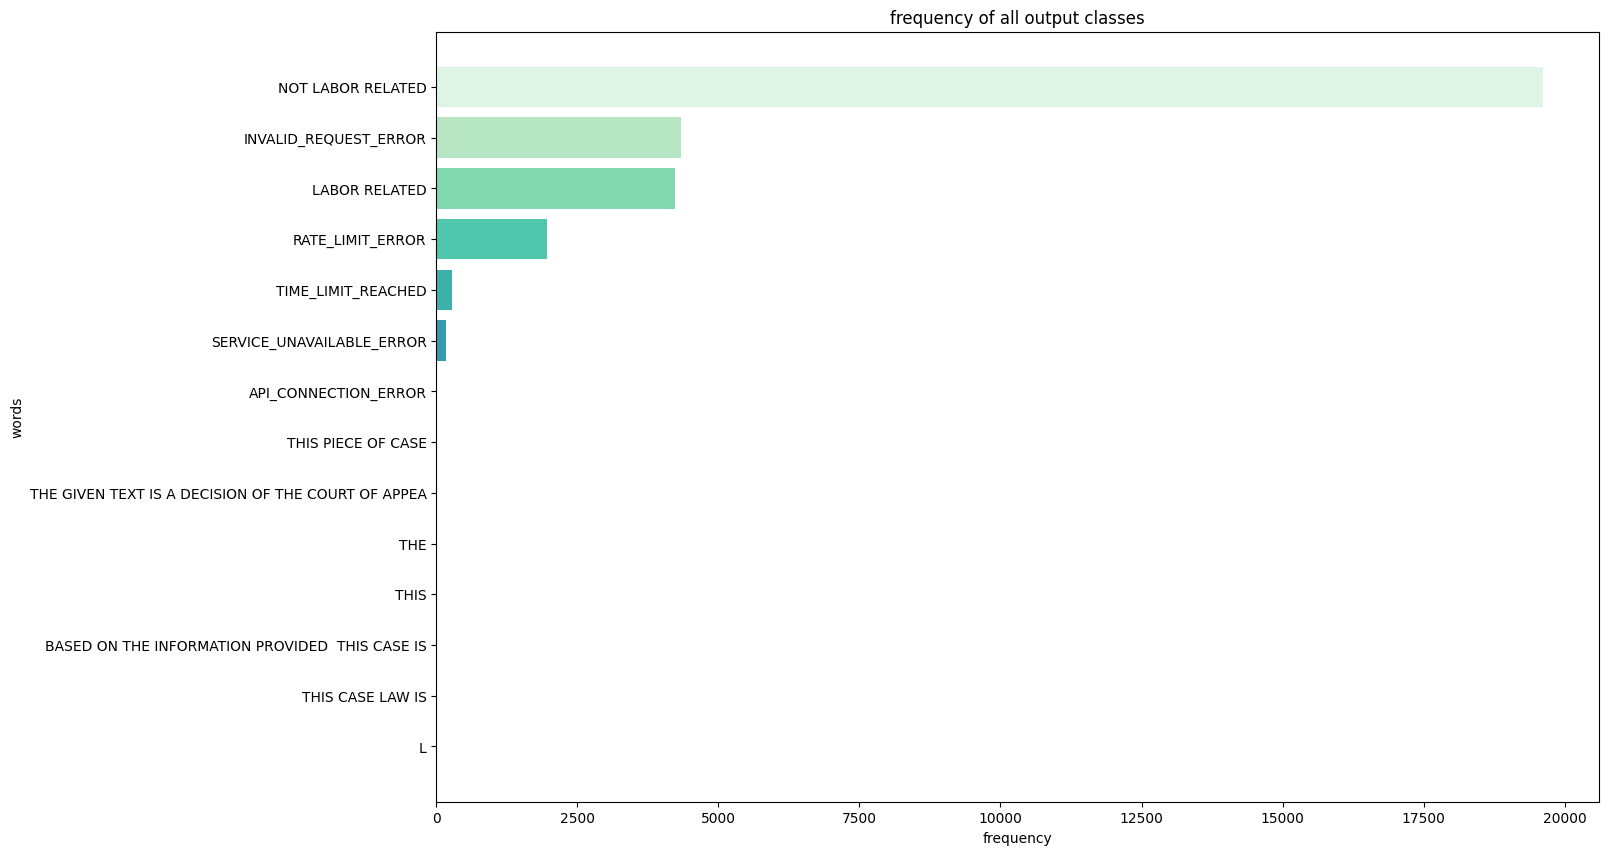

In [19]:
view_word_frequency(answer_counts, colormap='mako', title='frequency of all output classes', limit=answer_counts.shape[0])

In [20]:
# drop all rows with values of the answer column other than 'NOT LABOR RELATED', 
# 'LABOR RELATED', 'INVALID_REQUEST_ERROR', 'RATE_LIMIT_ERROR', 'TIME_LIMIT_REACHED', 
# 'SERVICE_UNAVAILABLE_ERROR', 'API_CONNECTION_ERROR'
# answers__df.drop(index=answers__df[])
bools = ((answers__df['answer'] == 'NOT LABOR RELATED') | 
 (answers__df['answer'] == 'LABOR RELATED') | 
 (answers__df['answer'] == 'INVALID_REQUEST_ERROR') | 
(answers__df['answer'] == 'RATE_LIMIT_ERROR') | 
(answers__df['answer'] == 'TIME_LIMIT_REACHED') | 
(answers__df['answer'] == 'SERVICE_UNAVAILABLE_ERROR') |
(answers__df['answer'] == 'API_CONNECTION_ERROR'))

reduced = answers__df[bools]
reduced

,file_path,answer
0,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
1,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,TIME_LIMIT_REACHED
2,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,RATE_LIMIT_ERROR
3,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
4,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
...,...,...
30617,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
30618,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,INVALID_REQUEST_ERROR
30619,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,INVALID_REQUEST_ERROR
30620,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED


In [21]:
reduced['answer'].value_counts()

NOT LABOR RELATED            19623
INVALID_REQUEST_ERROR         4337
LABOR RELATED                 4228
RATE_LIMIT_ERROR              1971
TIME_LIMIT_REACHED             282
SERVICE_UNAVAILABLE_ERROR      164
API_CONNECTION_ERROR             9
Name: answer, dtype: int64

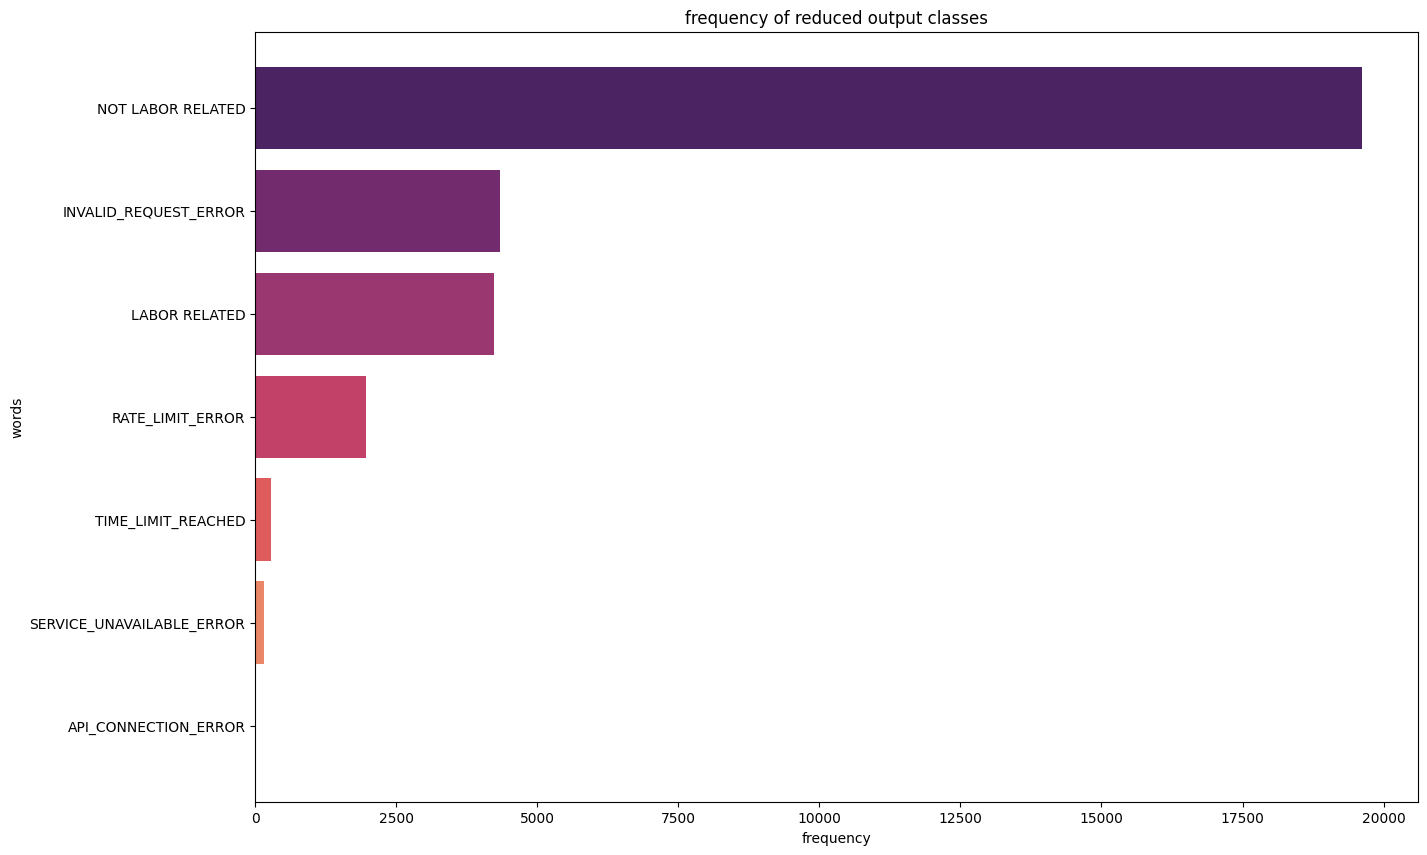

In [22]:
view_word_frequency(reduced['answer'].value_counts(), colormap='flare', title='frequency of reduced output classes', limit=reduced['answer'].value_counts().shape[0])

In [23]:
# rename file_path column to abs_file_path
reduced.rename(columns={'file_path': 'abs_file_path'}, inplace=True)

# reset indeces of now reduced dataset, with removed rows with unclear 
# answers reduced.to_csv. Do not set as new column anymore the column 
# of old indeces also by simply setting drop to true
reduced.reset_index(drop=True, inplace=True)
reduced

C:\Users\Mig\AppData\Local\Temp\ipykernel_8800\4215035736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced.rename(columns={'file_path': 'abs_file_path'}, inplace=True)


,abs_file_path,answer
0,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
1,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,TIME_LIMIT_REACHED
2,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,RATE_LIMIT_ERROR
3,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
4,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
...,...,...
30609,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED
30610,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,INVALID_REQUEST_ERROR
30611,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,INVALID_REQUEST_ERROR
30612,d:\Projects\To Github\LaRJ-Corpus\raw jurispru...,NOT LABOR RELATED


In [24]:
# replace all occurences of backward slash with forward slash
# in order to ensure that when path is read it won't throw an
# OSError: [Errno 22] Invalid argument
reduced['abs_file_path'] = reduced['abs_file_path'].apply(lambda abs_file_path: re.sub(r'\\', '/', abs_file_path))
reduced

C:\Users\Mig\AppData\Local\Temp\ipykernel_8800\3323428195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced['abs_file_path'] = reduced['abs_file_path'].apply(lambda abs_file_path: re.sub(r'\\', '/', abs_file_path))


,abs_file_path,answer
0,d:/Projects/To Github/LaRJ-Corpus/raw jurispru...,NOT LABOR RELATED
1,d:/Projects/To Github/LaRJ-Corpus/raw jurispru...,TIME_LIMIT_REACHED
2,d:/Projects/To Github/LaRJ-Corpus/raw jurispru...,RATE_LIMIT_ERROR
3,d:/Projects/To Github/LaRJ-Corpus/raw jurispru...,NOT LABOR RELATED
4,d:/Projects/To Github/LaRJ-Corpus/raw jurispru...,NOT LABOR RELATED
...,...,...
30609,d:/Projects/To Github/LaRJ-Corpus/raw jurispru...,NOT LABOR RELATED
30610,d:/Projects/To Github/LaRJ-Corpus/raw jurispru...,INVALID_REQUEST_ERROR
30611,d:/Projects/To Github/LaRJ-Corpus/raw jurispru...,INVALID_REQUEST_ERROR
30612,d:/Projects/To Github/LaRJ-Corpus/raw jurispru...,NOT LABOR RELATED


In [25]:
# save answers__df relative to this notebooks directory
reduced.to_csv('./answers__df.csv')